In [1]:
#Imports
import pandas as pd
import csv
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import time
import datetime
import matplotlib.ticker
import matplotlib.dates

import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [2]:
#Cargamos fichero datos_filtrados.csv
df_datos_filtrados = pd.read_csv('/Users/josemarti/Documents/TFM/csv_bigdata/datos_filtrados.csv', sep=';')
df_datos_filtrados.head(5)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud
0,2015-01-01,Jueves,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478
1,2015-01-01,Jueves,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414
2,2015-01-01,Jueves,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396
3,2015-01-01,Jueves,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677
4,2015-01-01,Jueves,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994


In [3]:
df_datos_filtrados['time'] = df_datos_filtrados['hora'].str.replace(r'[\d:]$', '0')

#Unimos columna fecha con columna hora, para crear columna tiempo
df_datos_filtrados['tiempo'] = pd.to_datetime(df_datos_filtrados['fecha'] + ' ' + df_datos_filtrados['time'])

#Cambiamos la columna tiempo a datetime
df_datos_filtrados['tiempo'] = df_datos_filtrados['tiempo'].astype('datetime64[ns]') 
df_datos_filtrados.head(5)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud,time,tiempo
0,2015-01-01,Jueves,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478,00:15:00,2015-01-01 00:15:00
1,2015-01-01,Jueves,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414,00:15:00,2015-01-01 00:15:00
2,2015-01-01,Jueves,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396,00:15:00,2015-01-01 00:15:00
3,2015-01-01,Jueves,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677,00:15:00,2015-01-01 00:15:00
4,2015-01-01,Jueves,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994,00:15:00,2015-01-01 00:15:00


In [4]:
df_datos_filtrados[['fecha','hora','id_tramo','des_tramo','estado','longitud','latitud','time','tiempo']].head(5)

,fecha,hora,id_tramo,des_tramo,estado,longitud,latitud,time,tiempo
0,2015-01-01,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478,00:15:00,2015-01-01 00:15:00
1,2015-01-01,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414,00:15:00,2015-01-01 00:15:00
2,2015-01-01,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396,00:15:00,2015-01-01 00:15:00
3,2015-01-01,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677,00:15:00,2015-01-01 00:15:00
4,2015-01-01,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994,00:15:00,2015-01-01 00:15:00


In [5]:
df_datos_filtrados.dtypes

fecha                 object
dia_semana            object
hora                  object
id_tramo              object
des_tramo             object
estado                 int64
longitud             float64
latitud              float64
time                  object
tiempo        datetime64[ns]
dtype: object

**Media Horas - Días**

In [6]:
df_media_hora_dia = df_datos_filtrados[['fecha','time','estado']]

#Cambiar minutos y segundo a cero
df_media_hora_dia['horas'] = df_media_hora_dia['time'].str.replace(r'(?<=\d\d:)\d\d:\d\d', '00:00')
df_media_hora_dia.head(5)

,fecha,time,estado,horas
0,2015-01-01,00:15:00,37,00:00:00
1,2015-01-01,00:15:00,33,00:00:00
2,2015-01-01,00:15:00,139,00:00:00
3,2015-01-01,00:15:00,187,00:00:00
4,2015-01-01,00:15:00,218,00:00:00


In [7]:
df_media_hora_dia.tail(5)

,fecha,time,estado,horas
11899954,2015-12-31,23:00:00,12,23:00:00
11899955,2015-12-31,23:00:00,21,23:00:00
11899956,2015-12-31,23:00:00,47,23:00:00
11899957,2015-12-31,23:00:00,44,23:00:00
11899958,2015-12-31,23:00:00,38,23:00:00


In [8]:
#Comprobamos si existe algún valor nulo en el dataframe
df_media_hora_dia.isna().sum()

fecha     0
time      0
estado    0
horas     0
dtype: int64

In [9]:
df_media_hora_dia.dtypes

fecha     object
time      object
estado     int64
horas     object
dtype: object

In [10]:
df_media_hora_dia.count()

fecha     11899959
time      11899959
estado    11899959
horas     11899959
dtype: int64

In [11]:
#Media por fecha
df_media_hora_dia = df_media_hora_dia.groupby(['fecha','horas']).estado.mean()\
                    .to_frame().reset_index()

df_media_red = df_media_hora_dia[df_media_hora_dia['estado'] < 3256.5] #valor anómalo

df_media_red.head(5)

,fecha,horas,estado
0,2015-01-01,00:00:00,221.141660
1,2015-01-01,01:00:00,668.117065
2,2015-01-01,02:00:00,548.699670
3,2015-01-01,03:00:00,421.338321
4,2015-01-01,04:00:00,360.711426


In [12]:
#Unimos columna fecha con columna hora, para crear columna tiempo
df_media_red['tiempo'] = pd.to_datetime(df_media_red['fecha'] + ' ' + df_media_red['horas'])

#Cambiamos la columna tiempo a datetime
df_media_red['tiempo'] = df_media_red['tiempo'].astype('datetime64[ns]') 

df_media_red.head(5)

,fecha,horas,estado,tiempo
0,2015-01-01,00:00:00,221.141660,2015-01-01 00:00:00
1,2015-01-01,01:00:00,668.117065,2015-01-01 01:00:00
2,2015-01-01,02:00:00,548.699670,2015-01-01 02:00:00
3,2015-01-01,03:00:00,421.338321,2015-01-01 03:00:00
4,2015-01-01,04:00:00,360.711426,2015-01-01 04:00:00


In [13]:
df_media_red.dtypes

fecha             object
horas             object
estado           float64
tiempo    datetime64[ns]
dtype: object

In [14]:
df_media_red.count()

fecha     7882
horas     7882
estado    7882
tiempo    7882
dtype: int64

In [15]:
print('Total Filas: ',df_media_red.shape[0])

Total Filas:  7882


In [16]:
df_media_red.insert(loc=0, column='date', value=np.arange(len(df_media_red))+1)
df_media_red

,date,fecha,horas,estado,tiempo
0,1,2015-01-01,00:00:00,221.141660,2015-01-01 00:00:00
1,2,2015-01-01,01:00:00,668.117065,2015-01-01 01:00:00
2,3,2015-01-01,02:00:00,548.699670,2015-01-01 02:00:00
3,4,2015-01-01,03:00:00,421.338321,2015-01-01 03:00:00
4,5,2015-01-01,04:00:00,360.711426,2015-01-01 04:00:00
...,...,...,...,...,...
7897,7878,2015-12-31,16:00:00,774.577558,2015-12-31 16:00:00
7898,7879,2015-12-31,17:00:00,782.537461,2015-12-31 17:00:00
7899,7880,2015-12-31,18:00:00,801.316049,2015-12-31 18:00:00
7900,7881,2015-12-31,22:00:00,336.165557,2015-12-31 22:00:00


In [17]:
df_media_red[['tiempo','estado']].head(5)

,tiempo,estado
0,2015-01-01 00:00:00,221.141660
1,2015-01-01 01:00:00,668.117065
2,2015-01-01 02:00:00,548.699670
3,2015-01-01 03:00:00,421.338321
4,2015-01-01 04:00:00,360.711426


In [18]:
df_media_red[['tiempo','date','estado']].head(5)

,tiempo,date,estado
0,2015-01-01 00:00:00,1,221.141660
1,2015-01-01 01:00:00,2,668.117065
2,2015-01-01 02:00:00,3,548.699670
3,2015-01-01 03:00:00,4,421.338321
4,2015-01-01 04:00:00,5,360.711426


In [19]:
df_media_red[['tiempo','date','estado']].count()

tiempo    7882
date      7882
estado    7882
dtype: int64

In [20]:
df_media_red[['tiempo','date','estado']].dtypes

tiempo    datetime64[ns]
date               int64
estado           float64
dtype: object

**Gráfico** 

In [21]:
df_plot = df_media_red[['tiempo','estado']]
df_plot.set_index('tiempo',inplace=True)
df_plot.head(5)

,estado
tiempo,
2015-01-01 00:00:00,221.141660
2015-01-01 01:00:00,668.117065
2015-01-01 02:00:00,548.699670
2015-01-01 03:00:00,421.338321
2015-01-01 04:00:00,360.711426


[Text(0.5, 1.0, 'Media Tráfico 2015')]

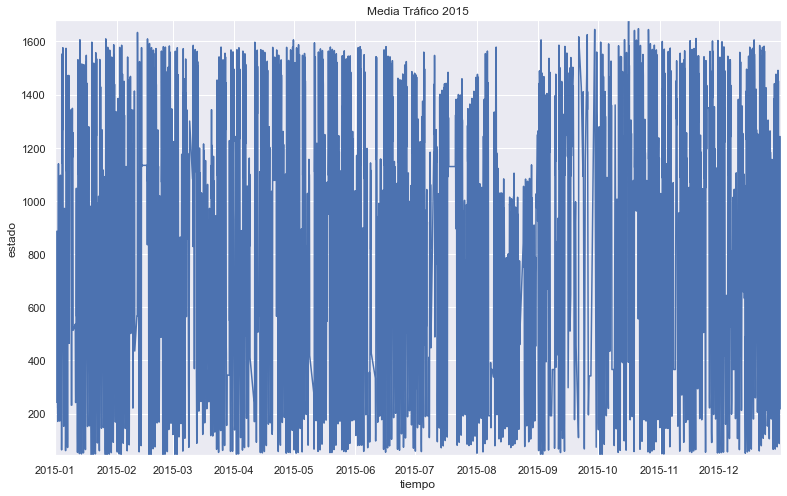

In [22]:
#df_plot.plot(figsize=(16, 8))
#plt.margins(x=0,y=0)
#plt.show()

sns.set_theme(style='darkgrid')
plt.figure(figsize=(13, 8))
plt.margins(x=0,y=0)
sns.lineplot(x ='tiempo',y='estado',data=df_plot).set(title='Media Tráfico 2015')

**Media Timestamp Días**

In [22]:
df_media_timestamp_dia = df_datos_filtrados[['fecha','time','estado']]

#Convertimos los valores de tiempo a timestamp, de esta forma pasan a numéricos
df_media_timestamp_dia['timestamp'] = df_media_timestamp_dia['time'].values.astype(np.int64) // 10 ** 9
df_media_timestamp_dia.head(5)

ValueError: invalid literal for int() with base 10: '00:15:00'

In [9]:
#Media por fecha
df_media_timestamp_dia = df_media_timestamp_dia.groupby(['fecha','timestamp','tiempo']).estado.mean()\
                        .astype(np.int32).to_frame().reset_index()

df_media_timestamp_dia.head(5)

,fecha,timestamp,tiempo,estado
0,2015-01-01,1420071300,2015-01-01 00:15:00,99
1,2015-01-01,1420072200,2015-01-01 00:30:00,280
2,2015-01-01,1420073100,2015-01-01 00:45:00,280
3,2015-01-01,1420074900,2015-01-01 01:15:00,663
4,2015-01-01,1420075800,2015-01-01 01:30:00,694


In [10]:
df_media_timestamp_dia.tail(5)

,fecha,timestamp,tiempo,estado
29644,2015-12-31,1451584800,2015-12-31 18:00:00,801
29645,2015-12-31,1451600100,2015-12-31 22:15:00,430
29646,2015-12-31,1451601000,2015-12-31 22:30:00,319
29647,2015-12-31,1451601900,2015-12-31 22:45:00,257
29648,2015-12-31,1451602800,2015-12-31 23:00:00,217


In [11]:
df_media_timestamp_dia.count()

fecha        29649
timestamp    29649
tiempo       29649
estado       29649
dtype: int64

In [13]:
ts = datetime.datetime.fromtimestamp(1420071300)
print(ts.strftime('%Y-%m-%d %H:%M:%S'))

2015-01-01 01:15:00


In [14]:
ts_train_start = datetime.datetime.strptime('2015-01-01 00:15:00', '%Y-%m-%d %H:%M:%S').timestamp()
ts_train_end = datetime.datetime.strptime('2015-09-30 23:45:00', '%Y-%m-%d %H:%M:%S').timestamp()
ts_test_start = datetime.datetime.strptime('2015-10-01 00:00:00', '%Y-%m-%d %H:%M:%S').timestamp()
print('Inicio Train: ',ts_train_start)
print('Fin Train   : ',ts_train_end)
print('Inicio Test : ',ts_test_start)

Inicio Train:  1420067700.0
Fin Train   :  1443649500.0
Inicio Test :  1443650400.0


In [15]:
ts_pred = datetime.datetime.strptime('2016-10-01 00:00:00', '%Y-%m-%d %H:%M:%S').timestamp()
print(ts_pred)

1475272800.0


In [23]:
start = '2016-01-01 00:00'
pred_dates = pd.date_range(start,freq='H',periods=24).to_frame()
pred_dates.rename(columns={0: 'Fecha'},inplace = True)
pred_dates

,Fecha
2016-01-01 00:00:00,2016-01-01 00:00:00
2016-01-01 01:00:00,2016-01-01 01:00:00
2016-01-01 02:00:00,2016-01-01 02:00:00
2016-01-01 03:00:00,2016-01-01 03:00:00
2016-01-01 04:00:00,2016-01-01 04:00:00
2016-01-01 05:00:00,2016-01-01 05:00:00
2016-01-01 06:00:00,2016-01-01 06:00:00
2016-01-01 07:00:00,2016-01-01 07:00:00
2016-01-01 08:00:00,2016-01-01 08:00:00
2016-01-01 09:00:00,2016-01-01 09:00:00


### 1.- Regresión Lineal

In [24]:
#importamos paquete Linear Regression desde sklearn
from sklearn.linear_model import LinearRegression

In [25]:
df_rl_dias = df_media_red.copy()
df_rl_dias

,date,fecha,horas,estado,tiempo
0,1,2015-01-01,00:00:00,221.141660,2015-01-01 00:00:00
1,2,2015-01-01,01:00:00,668.117065,2015-01-01 01:00:00
2,3,2015-01-01,02:00:00,548.699670,2015-01-01 02:00:00
3,4,2015-01-01,03:00:00,421.338321,2015-01-01 03:00:00
4,5,2015-01-01,04:00:00,360.711426,2015-01-01 04:00:00
...,...,...,...,...,...
7897,7878,2015-12-31,16:00:00,774.577558,2015-12-31 16:00:00
7898,7879,2015-12-31,17:00:00,782.537461,2015-12-31 17:00:00
7899,7880,2015-12-31,18:00:00,801.316049,2015-12-31 18:00:00
7900,7881,2015-12-31,22:00:00,336.165557,2015-12-31 22:00:00


In [26]:
df_rl_dias[['date','estado']].head(5)

,date,estado
0,1,221.141660
1,2,668.117065
2,3,548.699670
3,4,421.338321
4,5,360.711426


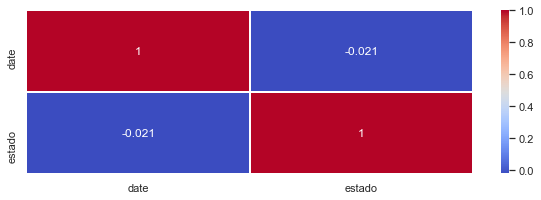

In [27]:
#Correlación de las variables con respecto a estado
fig, ax = plt.subplots(figsize=(10,3))
sns.heatmap(data=df_rl_dias.astype({'estado': 'int32'}).corr(),annot=True,vmax=1.0, cmap='coolwarm',\
            linewidths=.5, ax=ax);

In [28]:
#Selección variables independientes y dependientes
X_train_rl = df_rl_dias['date'] # Features 
y_train_rl = df_rl_dias['estado'] # Target variable

In [29]:
#División Train y Test
X_train,X_test,y_train,y_test=train_test_split(X_train_rl,y_train_rl,test_size=0.25,random_state=42)

In [30]:
print('Entrenamiento: ',X_train.shape[0])
print('Test:          ',X_test.shape[0])

Entrenamiento:  5911
Test:           1971


In [31]:
print(X_test)

1402    1403
2304    2305
7280    7261
3210    3211
5165    5166
        ... 
1952    1953
3309    3310
7116    7097
439      440
1379    1380
Name: date, Length: 1971, dtype: int64


In [32]:
#Definición Modelo
linear = LinearRegression()  
modelo_LR = linear.fit(X_train.values.reshape(-1, 1),y_train) 
y_pred = modelo_LR.predict(X_test.values.reshape(-1, 1))
    
print(y_pred)

[803.53925259 800.90672785 786.44243451 ... 786.92107537 806.34980837
 803.60637905]


In [33]:
#RMSE
print('RMSE Linear Regression: ',round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

RMSE Linear Regression:  482.508


In [34]:
x_new = np.arange(24).reshape((-1, 1))
pred_LR = modelo_LR.predict(x_new)
print(pred_LR)

[807.63396678 807.63104824 807.6281297  807.62521116 807.62229262
 807.61937407 807.61645553 807.61353699 807.61061845 807.60769991
 807.60478136 807.60186282 807.59894428 807.59602574 807.5931072
 807.59018866 807.58727011 807.58435157 807.58143303 807.57851449
 807.57559595 807.5726774  807.56975886 807.56684032]


In [35]:
pred_dates_LR = pred_dates.copy()
pred_dates_LR['Media'] = pred_LR
pred_dates_LR.set_index('Fecha',inplace=True)
pred_dates_LR

,Media
Fecha,
2016-01-01 00:00:00,807.633967
2016-01-01 01:00:00,807.631048
2016-01-01 02:00:00,807.628130
2016-01-01 03:00:00,807.625211
2016-01-01 04:00:00,807.622293
2016-01-01 05:00:00,807.619374
2016-01-01 06:00:00,807.616456
2016-01-01 07:00:00,807.613537
2016-01-01 08:00:00,807.610618


In [36]:
pred_dates_LR.dtypes

Media    float64
dtype: object

[Text(0.5, 1.0, 'Predicciones Regresión Lineal')]

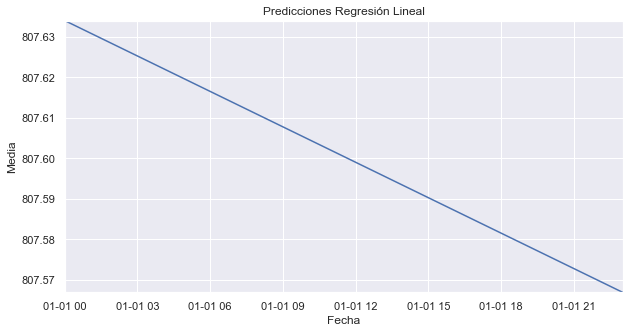

In [37]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.margins(x=0,y=0)
sns.lineplot(x ='Fecha',y='Media',data=pred_dates_LR).set(title='Predicciones Regresión Lineal')
#sns.barplot(x ='Fecha',y='Media',data=pred_dates_LR).set(title='Predicciones Regresión Lineal')

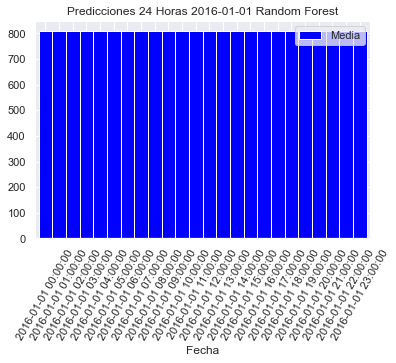

In [38]:
pred_dates_LR.plot.bar(rot=60,color ='blue',width = 1.0)
plt.title('Predicciones 24 Horas 2016-01-01 Random Forest')
plt.show()

In [105]:
#Guardamos dataframe
df_lr_series_data = pred_dates_LR.to_csv(r'/Users/josemarti/Documents/TFM/Machine_Learning_Data/temp_series_data/series_lr_data.csv',sep=';', index = True, header=True)

try:
    df_lr_series_data
    print('Archivo Creado Correctamente')
except EmptyDataError as ex:
    print('Datos Vacíos: \n',ex)
except ParserError as ex:
    print('Error Parseo Archivo: \n',ex)
except Exception as ex:
    print('Archivo Creado con Errores: \n',ex)

Archivo Creado Correctamente


### 2.- KNN

In [39]:
#importamos paquete KNN desde sklearn
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [40]:
df_knn_dias = df_media_red.copy()
df_knn_dias

,date,fecha,horas,estado,tiempo
0,1,2015-01-01,00:00:00,221.141660,2015-01-01 00:00:00
1,2,2015-01-01,01:00:00,668.117065,2015-01-01 01:00:00
2,3,2015-01-01,02:00:00,548.699670,2015-01-01 02:00:00
3,4,2015-01-01,03:00:00,421.338321,2015-01-01 03:00:00
4,5,2015-01-01,04:00:00,360.711426,2015-01-01 04:00:00
...,...,...,...,...,...
7897,7878,2015-12-31,16:00:00,774.577558,2015-12-31 16:00:00
7898,7879,2015-12-31,17:00:00,782.537461,2015-12-31 17:00:00
7899,7880,2015-12-31,18:00:00,801.316049,2015-12-31 18:00:00
7900,7881,2015-12-31,22:00:00,336.165557,2015-12-31 22:00:00


In [41]:
#Selección variables independientes y dependientes
X_train_knn = df_knn_dias['date'] # Features 
y_train_knn = df_knn_dias['estado'] # Target variable

In [42]:
#División Train y Test
X_train,X_test,y_train,y_test=train_test_split(X_train_knn,y_train_knn,test_size=0.25,random_state=42)

In [43]:
#Definición Número de vecinos a incluir en el modelo
#knn = KNeighborsClassifier(n_neighbors=2)
knn = KNeighborsRegressor(n_neighbors = 2)

#Entrenamiento del modelo
knn.fit(X_train.values.reshape(-1, 1), y_train)

KNeighborsRegressor(n_neighbors=2)

In [44]:
#Prediction
y_pred = knn.predict(X_test.values.reshape(-1, 1))

print(y_pred)

[ 121.99836793  644.2044335   341.18104545 ...  737.30185185 1326.2421599
  365.63205602]


In [45]:
#RMSE
print('RMSE Linear Regression: ',round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

RMSE Linear Regression:  200.433


In [46]:
x_new_knn = np.arange(24).reshape((-1, 1))
pred_KNN = knn.predict(x_new_knn)
print(pred_KNN)

[608.40836755 608.40836755 608.40836755 608.40836755 485.01899542
 391.02487353 297.27546826 286.74078076 286.74078076 268.66982195
 248.94282523 243.68112828 339.22906755 339.22906755 560.55100709
 590.4242654  479.14719454 479.14719454 643.21725365 809.94197654
 809.94197654 741.22493812 575.10612624 575.10612624]


In [47]:
pred_dates_KNN = pred_dates.copy()
pred_dates_KNN['Media'] = pred_KNN
pred_dates_KNN.set_index('Fecha',inplace=True)
pred_dates_KNN

,Media
Fecha,
2016-01-01 00:00:00,608.408368
2016-01-01 01:00:00,608.408368
2016-01-01 02:00:00,608.408368
2016-01-01 03:00:00,608.408368
2016-01-01 04:00:00,485.018995
2016-01-01 05:00:00,391.024874
2016-01-01 06:00:00,297.275468
2016-01-01 07:00:00,286.740781
2016-01-01 08:00:00,286.740781


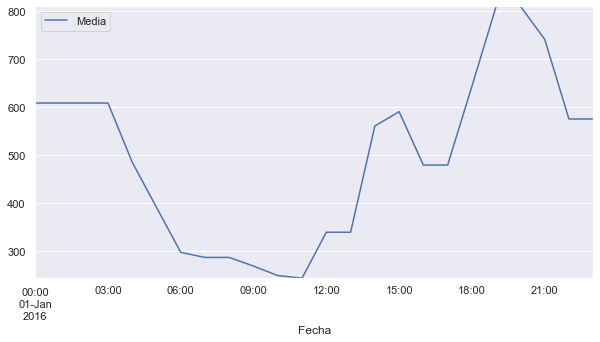

In [48]:
pred_dates_KNN.plot(figsize=(10, 5))
plt.margins(x=0,y=0)
plt.show()

[Text(0.5, 1.0, 'Predicciones KNN')]

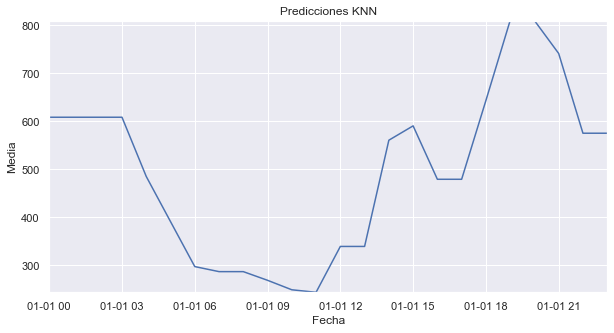

In [49]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.margins(x=0,y=0)
sns.lineplot(x ='Fecha',y='Media',data=pred_dates_KNN).set(title='Predicciones KNN')

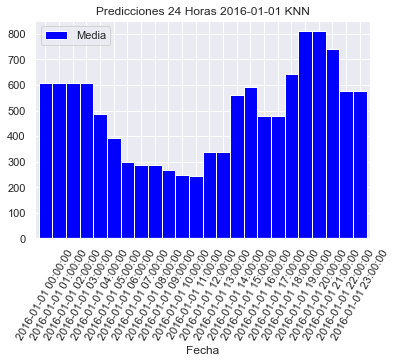

In [50]:
pred_dates_KNN.plot.bar(rot=60,color ='blue',width = 1.0)
plt.title('Predicciones 24 Horas 2016-01-01 KNN')
plt.show()

In [91]:
#Guardamos dataframe
df_knn_series_data = pred_dates_KNN.to_csv(r'/Users/josemarti/Documents/TFM/Machine_Learning_Data/temp_series_data/series_knn_data.csv',sep=';', index = True, header=True)

try:
    df_knn_series_data
    print('Archivo Creado Correctamente')
except EmptyDataError as ex:
    print('Datos Vacíos: \n',ex)
except ParserError as ex:
    print('Error Parseo Archivo: \n',ex)
except Exception as ex:
    print('Archivo Creado con Errores: \n',ex)

Archivo Creado Correctamente


### 3.- Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
df_RFr = df_media_red.copy()
df_RFr

,date,fecha,horas,estado,tiempo
0,1,2015-01-01,00:00:00,221.141660,2015-01-01 00:00:00
1,2,2015-01-01,01:00:00,668.117065,2015-01-01 01:00:00
2,3,2015-01-01,02:00:00,548.699670,2015-01-01 02:00:00
3,4,2015-01-01,03:00:00,421.338321,2015-01-01 03:00:00
4,5,2015-01-01,04:00:00,360.711426,2015-01-01 04:00:00
...,...,...,...,...,...
7897,7878,2015-12-31,16:00:00,774.577558,2015-12-31 16:00:00
7898,7879,2015-12-31,17:00:00,782.537461,2015-12-31 17:00:00
7899,7880,2015-12-31,18:00:00,801.316049,2015-12-31 18:00:00
7900,7881,2015-12-31,22:00:00,336.165557,2015-12-31 22:00:00


In [53]:
#Selección variables independientes y dependientes
X_train_RFr = df_RFr['date'] # Features 
y_train_RFr = df_RFr['estado'] # Target variable

In [54]:
#División Train y Test
X_train,X_test,y_train,y_test=train_test_split(X_train_RFr,y_train_RFr,test_size=0.25,random_state=42)

In [55]:
rfr_model = RandomForestRegressor(n_estimators=100,max_depth=8,bootstrap=True,verbose=2,\
                            max_features = 'auto',random_state = 42)

rfr_model.fit(X_train.values.reshape(-1, 1), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(max_depth=8, random_state=42, verbose=2)

In [56]:
#predictions
y_pred=rfr_model.predict(X_test.values.reshape(-1, 1))
print(y_pred)

[778.83484434 815.43977691 687.47628767 ... 804.24391793 793.85035433
 790.72362622]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [57]:
#RMSE
print('RMSE RANDOM FOREST: ',round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

RMSE RANDOM FOREST:  444.184


In [58]:
x_new_RF = np.arange(24).reshape((-1, 1))
pred_RF = rfr_model.predict(x_new_RF)
print(pred_RF)

[581.59600656 581.59600656 581.59600656 555.32417962 441.64957142
 389.41249128 336.71534741 325.14426247 322.61234403 318.9537258
 308.81231038 309.14995234 318.78012012 418.84088064 556.27202949
 573.01603816 523.38998202 523.75277128 541.89797766 656.29958337
 684.06492771 674.06145932 646.33610634 523.71384013]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [59]:
pred_dates_RF = pred_dates.copy()
pred_dates_RF['Media'] = pred_RF
pred_dates_RF.set_index('Fecha',inplace=True)
pred_dates_RF

,Media
Fecha,
2016-01-01 00:00:00,581.596007
2016-01-01 01:00:00,581.596007
2016-01-01 02:00:00,581.596007
2016-01-01 03:00:00,555.324180
2016-01-01 04:00:00,441.649571
2016-01-01 05:00:00,389.412491
2016-01-01 06:00:00,336.715347
2016-01-01 07:00:00,325.144262
2016-01-01 08:00:00,322.612344


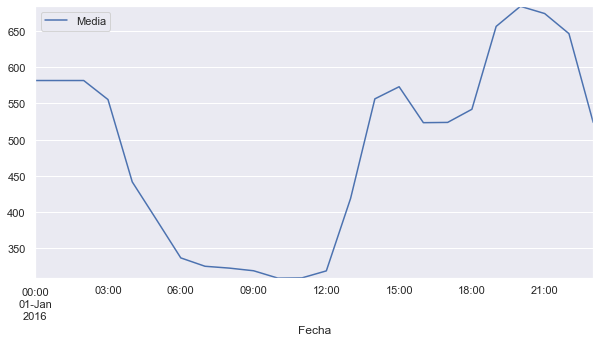

In [60]:
pred_dates_RF.plot(figsize=(10, 5))
plt.margins(x=0,y=0)
plt.show()

[Text(0.5, 1.0, 'Predicciones RF')]

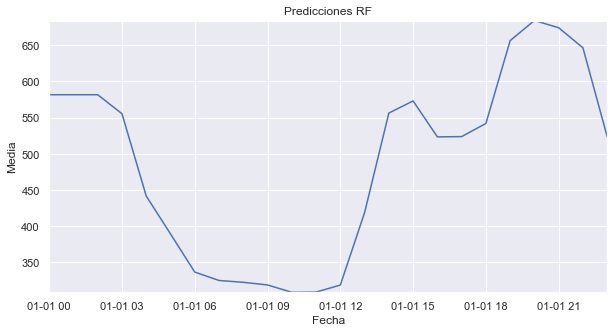

In [61]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.margins(x=0,y=0)
sns.lineplot(x ='Fecha',y='Media',data=pred_dates_RF).set(title='Predicciones RF')

In [117]:
#Guardamos dataframe
df_rf_series_data = pred_dates_RF.to_csv(r'/Users/josemarti/Documents/TFM/Machine_Learning_Data/temp_series_data/series_rf_data.csv',sep=';', index = True, header=True)

try:
    df_rf_series_data
    print('Archivo Creado Correctamente')
except EmptyDataError as ex:
    print('Datos Vacíos: \n',ex)
except ParserError as ex:
    print('Error Parseo Archivo: \n',ex)
except Exception as ex:
    print('Archivo Creado con Errores: \n',ex)

Archivo Creado Correctamente


### 4.- Naive Bayes

In [62]:
#Import Naive Bayes 
from sklearn.naive_bayes import GaussianNB

In [63]:
df_NB = df_media_red.copy()
df_NB

,date,fecha,horas,estado,tiempo
0,1,2015-01-01,00:00:00,221.141660,2015-01-01 00:00:00
1,2,2015-01-01,01:00:00,668.117065,2015-01-01 01:00:00
2,3,2015-01-01,02:00:00,548.699670,2015-01-01 02:00:00
3,4,2015-01-01,03:00:00,421.338321,2015-01-01 03:00:00
4,5,2015-01-01,04:00:00,360.711426,2015-01-01 04:00:00
...,...,...,...,...,...
7897,7878,2015-12-31,16:00:00,774.577558,2015-12-31 16:00:00
7898,7879,2015-12-31,17:00:00,782.537461,2015-12-31 17:00:00
7899,7880,2015-12-31,18:00:00,801.316049,2015-12-31 18:00:00
7900,7881,2015-12-31,22:00:00,336.165557,2015-12-31 22:00:00


In [64]:
#Selección variables independientes y dependientes
X_train_NB = df_NB['date'] # Features 
y_train_NB = df_NB['estado'] # Target variable

In [65]:
#División Train y Test
X_train,X_test,y_train,y_test=train_test_split(X_train_RFr,y_train_RFr,test_size=0.25,random_state=42)

In [66]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train.values.reshape(-1, 1))
X_test = sc.transform(X_test.values.reshape(-1, 1))

In [67]:
#Clasificador
modelo_NB = GaussianNB()

#Entrenamiento del Modelo 
modelo_NB.fit(X_train.astype(int), y_train.astype(int))

GaussianNB()

In [68]:
#Predictions
y_pred = modelo_NB.predict(X_test)
print(y_pred)

[1341 1341  365 ...  365 1133 1341]


In [69]:
#RMSE de NB
print('RMSE NB: ',round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

RMSE NB:  621.202


In [70]:
x_new_NB = np.arange(24).reshape((-1, 1))
pred_NB = modelo_NB.predict(x_new_NB)
print(pred_NB)

[191 995  59 608 608 608 608 608 608 608 608 280 280 280 280 280 280 280
 280 280 280 280 280 280]


In [71]:
pred_dates_NB = pred_dates.copy()
pred_dates_NB['Media'] = pred_NB
pred_dates_NB.set_index('Fecha',inplace=True)
pred_dates_NB

,Media
Fecha,
2016-01-01 00:00:00,191
2016-01-01 01:00:00,995
2016-01-01 02:00:00,59
2016-01-01 03:00:00,608
2016-01-01 04:00:00,608
2016-01-01 05:00:00,608
2016-01-01 06:00:00,608
2016-01-01 07:00:00,608
2016-01-01 08:00:00,608


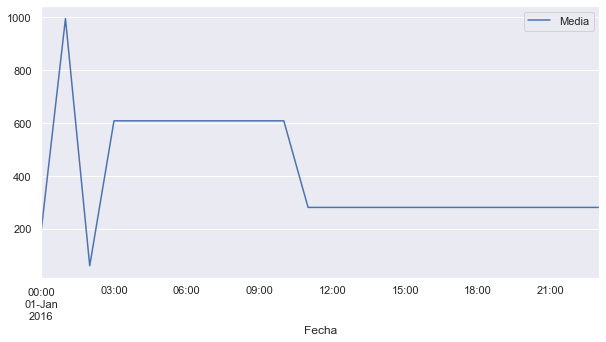

In [72]:
pred_dates_NB.plot(figsize=(10, 5))
#plt.margins(x=0,y=0)
plt.show()

[Text(0.5, 1.0, 'Predicciones Naive Bayes')]

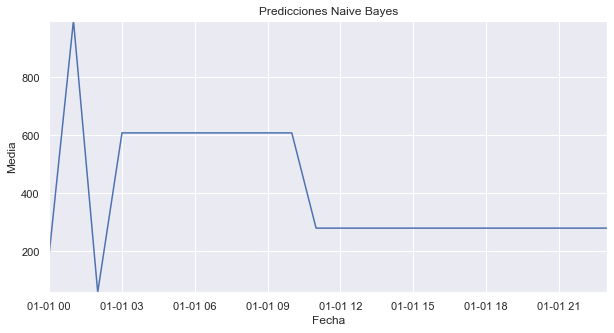

In [73]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.margins(x=0,y=0)
sns.lineplot(x ='Fecha',y='Media',data=pred_dates_NB).set(title='Predicciones Naive Bayes')

In [130]:
#Guardamos dataframe
df_NB_series_data = pred_dates_NB.to_csv(r'/Users/josemarti/Documents/TFM/Machine_Learning_Data/temp_series_data/series_NB_data.csv',sep=';', index = True, header=True)

try:
    df_NB_series_data
    print('Archivo Creado Correctamente')
except EmptyDataError as ex:
    print('Datos Vacíos: \n',ex)
except ParserError as ex:
    print('Error Parseo Archivo: \n',ex)
except Exception as ex:
    print('Archivo Creado con Errores: \n',ex)

Archivo Creado Correctamente


### 5.- Neural Network

In [74]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras

from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer

In [75]:
print('Versión TensorFlow: ',tf.__version__)

Versión TensorFlow:  2.5.0


In [76]:
df_NN = df_media_red.copy()
df_NN

,date,fecha,horas,estado,tiempo
0,1,2015-01-01,00:00:00,221.141660,2015-01-01 00:00:00
1,2,2015-01-01,01:00:00,668.117065,2015-01-01 01:00:00
2,3,2015-01-01,02:00:00,548.699670,2015-01-01 02:00:00
3,4,2015-01-01,03:00:00,421.338321,2015-01-01 03:00:00
4,5,2015-01-01,04:00:00,360.711426,2015-01-01 04:00:00
...,...,...,...,...,...
7897,7878,2015-12-31,16:00:00,774.577558,2015-12-31 16:00:00
7898,7879,2015-12-31,17:00:00,782.537461,2015-12-31 17:00:00
7899,7880,2015-12-31,18:00:00,801.316049,2015-12-31 18:00:00
7900,7881,2015-12-31,22:00:00,336.165557,2015-12-31 22:00:00


In [77]:
#Selección variables independientes y dependientes
X_train_NN = df_NN['date'] # Features 
y_train_NN = df_NN['estado'] # Target variable

In [78]:
#División Train y Test
X_train,X_test,y_train,y_test=train_test_split(X_train_NN,y_train_NN,test_size=0.25,random_state=42)

In [79]:
print('Entrenamiento: ',X_train.shape)
print('Test: ', X_test.shape)

Entrenamiento:  (5911,)
Test:  (1971,)


In [80]:
# Define the scaler 
scaler = StandardScaler().fit(X_train.values.reshape(-1, 1))

# Scale the train set
X_train = scaler.transform(X_train.values.reshape(-1, 1))

# Scale the test set
X_test = scaler.transform(X_test.values.reshape(-1, 1))

In [81]:
#determine the number of input features

model = keras.Sequential()
model.add(Dense(12, activation='relu', kernel_initializer='he_normal',input_dim=1)) #capa oculta
model.add( Dropout(0.5) ) #evitar overfitting

model.add(Dense(8,activation='relu', kernel_initializer='he_normal')) #capa oculta
model.add( Dropout(0.5) )

model.add(Dense(4,activation='relu', kernel_initializer='he_normal')) #capa oculta
model.add( Dropout(0.5) )

model.add(Dense(1,activation='sigmoid')) #capa salida
model.add( Dropout(0.5) )

In [82]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam',\
              loss='mean_squared_error',\
              metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5

In [83]:
model_NN = model.fit(X_train, y_train, \
                    batch_size=1000, \
                    epochs=20, \
                    verbose=1,\
                    shuffle=True,\
                    validation_data=(X_test, y_test))
model_NN

Epoch 1/20
6/6 [==============================] - 1s 32ms/step - loss: 866263.4375 - mse: 866263.4375 - val_loss: 890916.8750 - val_mse: 890916.8750
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 866247.4375 - mse: 866247.4375 - val_loss: 890869.0625 - val_mse: 890869.0625
Epoch 3/20
6/6 [==============================] - 0s 6ms/step - loss: 866235.5000 - mse: 866235.5000 - val_loss: 890816.1875 - val_mse: 890816.1875
Epoch 4/20
6/6 [==============================] - 0s 5ms/step - loss: 866197.8125 - mse: 866197.8125 - val_loss: 890754.9375 - val_mse: 890754.9375
Epoch 5/20
6/6 [==============================] - 0s 6ms/step - loss: 866168.6250 - mse: 866168.6250 - val_loss: 890684.4375 - val_mse: 890684.4375
Epoch 6/20
6/6 [==============================] - 0s 6ms/step - loss: 866170.8750 - mse: 866170.8750 - val_loss: 890609.6875 - val_mse: 890609.6875
Epoch 7/20
6/6 [==============================] - 0s 5ms/step - loss: 866110.6875 - mse: 866110.6875 - val_loss

In [84]:
#Model Predictions
y_pred = model.predict(X_test)
print(y_pred)

[[0.91408217]
 [0.8498099 ]
 [0.74014217]
 ...
 [0.73431677]
 [0.9542899 ]
 [0.9153383 ]]


In [85]:
# evaluate the model
loss, acc_nn = model.evaluate(X_test, y_test,verbose=0)
print('Accuracy: %.2f' % (acc_nn))

import math
rmse_nn = math.sqrt(acc_nn)
print('RMSE NN',round(rmse_nn,3))

Accuracy: 890099.00
RMSE NN 943.451


In [86]:
x_new_NN = np.arange(24).reshape((-1, 1))
pred_NN = model.predict(x_new_NN)
print(pred_NN)

[[0.6328092 ]
 [0.69425064]
 [0.7807311 ]
 [0.84352267]
 [0.89084685]
 [0.9251288 ]
 [0.94925714]
 [0.96589637]
 [0.9772104 ]
 [0.9848299 ]
 [0.9899281 ]
 [0.9933246 ]
 [0.99558085]
 [0.99707675]
 [0.99806714]
 [0.9987226 ]
 [0.9991559 ]
 [0.9994423 ]
 [0.9996315 ]
 [0.99975663]
 [0.9998392 ]
 [0.9998938 ]
 [0.99992985]
 [0.9999536 ]]


In [87]:
#Invertimos los valores obtenidos en redes neuronales
inverted_pred = scaler.inverse_transform(pred_NN)
inverted_pred

array([[5385.997 ],
       [5524.9683],
       [5720.5737],
       [5862.5986],
       [5969.6387],
       [6047.1787],
       [6101.7534],
       [6139.3887],
       [6164.9795],
       [6182.2134],
       [6193.745 ],
       [6201.4272],
       [6206.531 ],
       [6209.914 ],
       [6212.1543],
       [6213.6367],
       [6214.6167],
       [6215.2646],
       [6215.6924],
       [6215.9756],
       [6216.162 ],
       [6216.2856],
       [6216.367 ],
       [6216.421 ]], dtype=float32)

In [88]:
pred_dates_NN = pred_dates.copy()
pred_dates_NN['Media'] = inverted_pred
pred_dates_NN.set_index('Fecha',inplace=True)
pred_dates_NN

,Media
Fecha,
2016-01-01 00:00:00,5385.997070
2016-01-01 01:00:00,5524.968262
2016-01-01 02:00:00,5720.573730
2016-01-01 03:00:00,5862.598633
2016-01-01 04:00:00,5969.638672
2016-01-01 05:00:00,6047.178711
2016-01-01 06:00:00,6101.753418
2016-01-01 07:00:00,6139.388672
2016-01-01 08:00:00,6164.979492


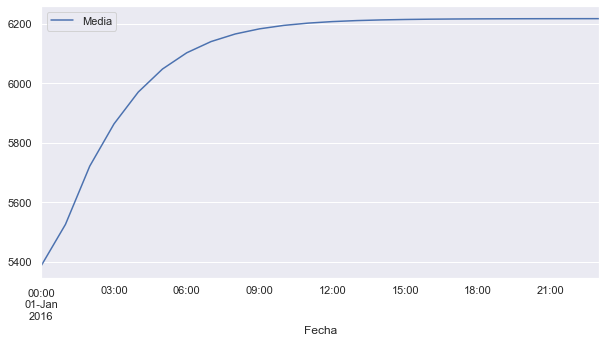

In [89]:
pred_dates_NN.plot(figsize=(10, 5))
plt.show()

[Text(0.5, 1.0, 'Predicciones Redes Neuronales')]

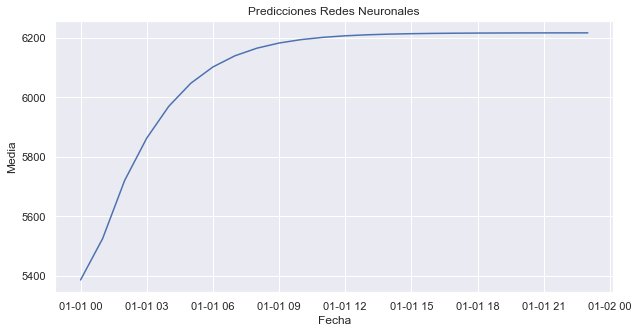

In [90]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
#plt.margins(x=0,y=0)
sns.lineplot(x ='Fecha',y='Media',data=pred_dates_NN).set(title='Predicciones Redes Neuronales')

In [158]:
#Guardamos dataframe
df_NN_series_data = pred_dates_NN.to_csv(r'/Users/josemarti/Documents/TFM/Machine_Learning_Data/temp_series_data/series_NN_data.csv',sep=';', index = True, header=True)

try:
    df_NB_series_data
    print('Archivo Creado Correctamente')
except EmptyDataError as ex:
    print('Datos Vacíos: \n',ex)
except ParserError as ex:
    print('Error Parseo Archivo: \n',ex)
except Exception as ex:
    print('Archivo Creado con Errores: \n',ex)

Archivo Creado Correctamente


***Valores Modelos***

In [91]:
model_name = ['Regresión_Lineal','KNN','Random_Forest','Naive Bayes','Redes_Neuronales']
model_value = [482.508,200.433,444.184,621.202,943.315]
zip_model = zip(model_name,model_value)
model_df = pd.DataFrame(zip_model, columns = ['Modelo' , 'RMSE'])
model_df

,Modelo,RMSE
0,Regresión_Lineal,482.508
1,KNN,200.433
2,Random_Forest,444.184
3,Naive Bayes,621.202
4,Redes_Neuronales,943.315


In [92]:
(model_df
 .style
 .background_gradient(subset=['RMSE'], cmap='Blues_r')
 .set_caption('Comparación RMSE Modelos'))

,Modelo,RMSE
0,Regresión_Lineal,482.508000
1,KNN,200.433000
2,Random_Forest,444.184000
3,Naive Bayes,621.202000
4,Redes_Neuronales,943.315000


In [91]:
#Media 24 horas 01/01/2015
df_media_dia_1 = df_media_hora_dia[(df_media_hora_dia['fecha'] == '2015-01-01')].reset_index()

df_media_dia_1.insert(loc=0, column='time', value=np.arange(len(df_media_dia_1)))


df_plot_1 = df_media_dia_1[['time','estado']]
df_plot_1.set_index('time',inplace=True)
df_plot_1

,estado
time,
0,221.141660
1,668.117065
2,548.699670
3,421.338321
4,360.711426
5,305.718125
6,288.832812
7,284.648750
8,289.450943


[Text(0.5, 1.0, 'Media Tráfico 01/01/2015')]

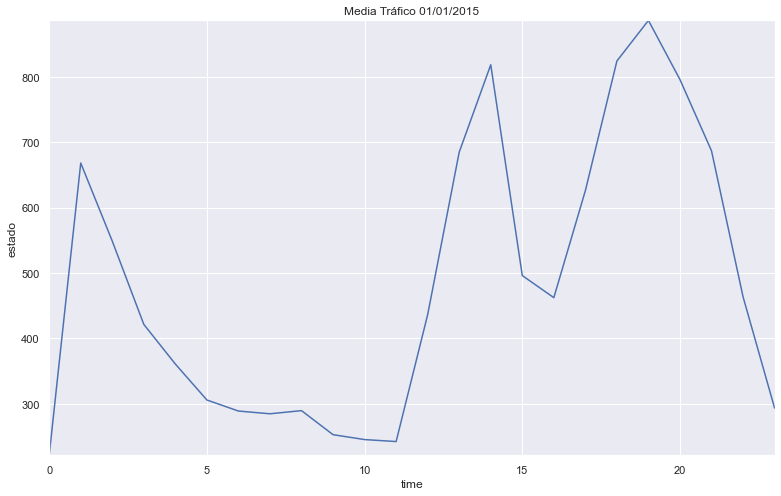

In [92]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(13, 8))
plt.margins(x=0,y=0)
sns.lineplot(x ='time',y='estado',data=df_plot_1).set(title='Media Tráfico 01/01/2015')

In [94]:
dates_LR = pred_dates_LR.reset_index()

dates_LR.insert(loc=0, column='time', value=np.arange(len(dates_LR)))
dates_LR['estado']=dates_LR['Media']

df_plot_LR = dates_LR[['time','estado']]
df_plot_LR.set_index('time',inplace=True)
df_plot_LR

,estado
time,
0,807.633967
1,807.631048
2,807.628130
3,807.625211
4,807.622293
5,807.619374
6,807.616456
7,807.613537
8,807.610618


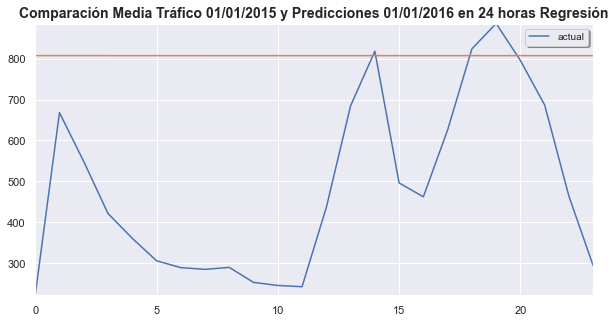

In [95]:
plt.figure(figsize=(10, 5))
plt.title('Comparación Media Tráfico 01/01/2015 y Predicciones 01/01/2016 en 24 horas Regresión',fontweight='bold',fontsize=14)
plt.plot(df_plot_1)
plt.legend(['actual','pred'],loc="upper right",fontsize=10,shadow=True)
plt.plot(df_plot_LR)
plt.margins(x=0,y=0)

In [96]:
dates_KNN = pred_dates_KNN.reset_index()

dates_KNN.insert(loc=0, column='time', value=np.arange(len(dates_KNN)))
dates_KNN['estado']=dates_KNN['Media']

df_plot_KNN = dates_KNN[['time','estado']]
df_plot_KNN.set_index('time',inplace=True)
df_plot_KNN.head(5)

,estado
time,
0,608.408368
1,608.408368
2,608.408368
3,608.408368
4,485.018995


In [97]:
dates_RF = pred_dates_RF.reset_index()

dates_RF.insert(loc=0, column='time', value=np.arange(len(dates_RF)))
dates_RF['estado']=dates_RF['Media']

df_plot_RF = dates_RF[['time','estado']]
df_plot_RF.set_index('time',inplace=True)
df_plot_RF.head(5)

,estado
time,
0,581.596007
1,581.596007
2,581.596007
3,555.324180
4,441.649571


In [98]:
dates_NB = pred_dates_NB.reset_index()

dates_NB.insert(loc=0, column='time', value=np.arange(len(dates_NB)))
dates_NB['estado']=dates_NB['Media']

df_plot_NB = dates_NB[['time','estado']]
df_plot_NB.set_index('time',inplace=True)
df_plot_NB.head(5)

,estado
time,
0,191
1,995
2,59
3,608
4,608


In [99]:
dates_NN = pred_dates_NN.reset_index()

dates_NN.insert(loc=0, column='time', value=np.arange(len(dates_NN)))
dates_NN['estado']=dates_NN['Media']

df_plot_NN = dates_NN[['time','estado']]
df_plot_NN.set_index('time',inplace=True)
df_plot_NN.head(5)

,estado
time,
0,5385.997070
1,5524.968262
2,5720.573730
3,5862.598633
4,5969.638672


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Naive Bayes')

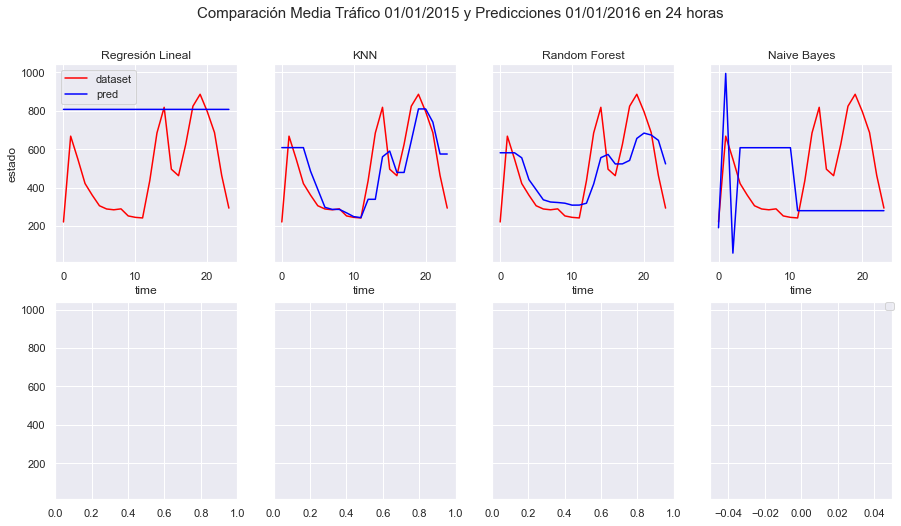

In [108]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8),sharey=True)
plt.margins(x=0,y=0)
#fig.legend()
#plt.legend(labels=['First','Second'],fontsize=15,bbox_to_anchor=(1.5,0.8))
#plt.legend(ncol=2,loc='lower left');
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

fig.suptitle('Comparación Media Tráfico 01/01/2015 y Predicciones 01/01/2016 en 24 horas',fontsize=15)

sns.lineplot(ax=axes[0, 0], data=df_plot_1['estado'],color='red',label='dataset').set_title('Regresión Lineal')
sns.lineplot(ax=axes[0, 0], data=df_plot_LR['estado'],color='blue',label='pred').set_title('Regresión Lineal')

sns.lineplot(ax=axes[0, 1], data=df_plot_1['estado'],color='red').set_title('KNN')
sns.lineplot(ax=axes[0, 1], data=df_plot_KNN['estado'],color='blue').set_title('KNN')

sns.lineplot(ax=axes[0, 2], data=df_plot_1['estado'],color='red').set_title('Random Forest')
sns.lineplot(ax=axes[0, 2], data=df_plot_RF['estado'],color='blue').set_title('Random Forest')

sns.lineplot(ax=axes[0, 3], data=df_plot_1['estado'],color='red').set_title('Naive Bayes')
sns.lineplot(ax=axes[0, 3], data=df_plot_NB['estado'],color='blue').set_title('Naive Bayes')

Text(0.5, 1.0, 'Redes Neuronales')

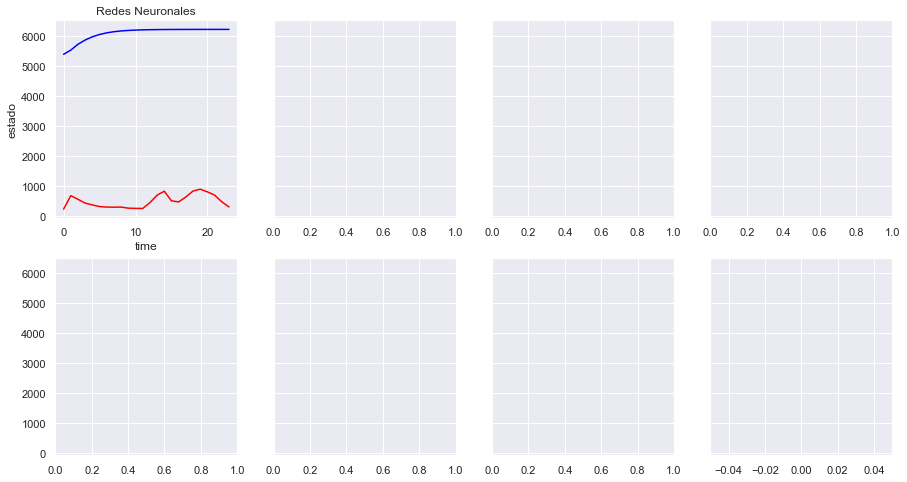

In [101]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8),sharey=True)
plt.margins(x=0,y=0)

sns.lineplot(ax=axes[0, 0], data=df_plot_1['estado'],color='red').set_title('Redes Neuronales')
sns.lineplot(ax=axes[0, 0], data=df_plot_NN['estado'],color='blue').set_title('Redes Neuronales')